In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.misc
from tqdm import tqdm
import imageio

# Loading/treating dataset of approx 100k images

In [2]:
# Use False if you don't want to show the daframes 
showing_data = True
#showing_data = False

In [3]:
df = pd.read_csv('../data/faces_fakes_or_not/metadata.csv')
if showing_data:
    print(df.head())

        videoname  original_width  original_height label        original
0  aznyksihgl.mp4             129              129  FAKE  xnojggkrxt.mp4
1  gkwmalrvcj.mp4             129              129  FAKE  hqqmtxvbjj.mp4
2  lxnqzocgaq.mp4             223              217  FAKE  xjzkfqddyk.mp4
3  itsbtrrelv.mp4             186              186  FAKE  kqvepwqxfe.mp4
4  ddvgrczjno.mp4             155              155  FAKE  pluadmqqta.mp4


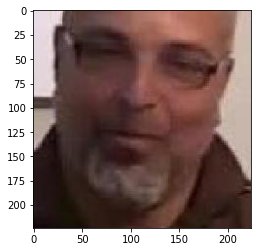

In [38]:
# plotting random images ! 
plt.imshow(plt.imread(f"../data/faces_fakes_or_not/faces/{df.sample(1)['videoname'].iloc[0][:-4]}.jpg"));

## Showing Gif skills

In [5]:
images = []
nb_faces = 60
nb_images_per_face = 3
for _ in range(nb_faces):
    MY_ARRAY = imageio.imread(f"../data/faces_fakes_or_not/faces/{df.sample(1)['videoname'].iloc[0][:-4]}.jpg")
    for __ in range(nb_images_per_face):
        images.append(MY_ARRAY)
imageio.mimsave('dumb.gif', images)

![SegmentLocal](dumb.gif "segment")

## Preparing the data

In [6]:
print('The data we are dealing with : ')
print(f"len : {len(df)}, uniques : {df['label'].unique()}, nb FAKE : {(df['label']=='FAKE').sum()}, nb REAL : {len(df)-(df['label']=='FAKE').sum()}")

The data we are dealing with : 
len : 95634, uniques : ['FAKE' 'REAL'], nb FAKE : 79341, nb REAL : 16293


In [7]:
## let's map these bitches
df['label'] = df['label'].map({'FAKE':1,'REAL':0})
df['label'].unique()
if showing_data:
    print(df.head())

        videoname  original_width  original_height  label        original
0  aznyksihgl.mp4             129              129      1  xnojggkrxt.mp4
1  gkwmalrvcj.mp4             129              129      1  hqqmtxvbjj.mp4
2  lxnqzocgaq.mp4             223              217      1  xjzkfqddyk.mp4
3  itsbtrrelv.mp4             186              186      1  kqvepwqxfe.mp4
4  ddvgrczjno.mp4             155              155      1  pluadmqqta.mp4


In [8]:
df_real = df[df['label']==0]
print('checking uniques :',df_real['label'].unique())
df_real = df_real.reset_index().drop(columns='index')
if showing_data:
    print(df_real.head())

checking uniques : [0]
        videoname  original_width  original_height  label original
0  mcehvkoidm.mp4             186              185      0      NaN
1  wzrybcopcd.mp4             223              223      0      NaN
2  tvrwjmjeyn.mp4             107              107      0      NaN
3  gnrbhysdok.mp4             186              186      0      NaN
4  gzmsocbmkz.mp4             107              107      0      NaN


In [9]:
df_fake = df[df['label']==1].sample(len(df_real))
print('checking uniques :',df_fake['label'].unique())
df_fake = df_fake.reset_index().drop(columns='index')
if showing_data:
    print(df_fake.head())

checking uniques : [1]
        videoname  original_width  original_height  label        original
0  syqwefkawl.mp4             186              186      1  pdbfkvicvd.mp4
1  hjpvcmgjzu.mp4             268              268      1  uyrfbdbgsl.mp4
2  lfwrfmvgpn.mp4             129              129      1  dxnbssaubh.mp4
3  wograxpbzq.mp4              90               90      1  dtpdsicgjm.mp4
4  nffhohhmdg.mp4              89               90      1  wfzdajooqb.mp4


In [10]:
my_balanced_df =  pd.concat([df_real, df_fake]).reset_index().drop(columns=['index','original_height','original_width','original'])
print('my data is now balanced :')
print(f"len : {len(my_balanced_df)}, uniques : {my_balanced_df['label'].unique()}, nb FAKE : {(my_balanced_df['label']==1).sum()}, nb REAL : {len(my_balanced_df)-(my_balanced_df['label']==1).sum()}")

my data is now balanced :
len : 32586, uniques : [0 1], nb FAKE : 16293, nb REAL : 16293


In [11]:
path_source = '../data/faces_fakes_or_not/faces/'

In [12]:
# splitting this subset into train and test, WITH SAMPLING to reduce the size of the dataset
from sklearn.model_selection import train_test_split

nb_rows_wanted = 5000

my_balanced_df_sampled = my_balanced_df.sample(nb_rows_wanted, random_state = 42)
y = my_balanced_df_sampled['label']
X = my_balanced_df_sampled['videoname']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
path = '../data/faces_fakes_or_not/faces/'
img = plt.imread(path + 'aznyksihgl.jpg')
if showing_data:
    print('Showing one np array of an image, scaled. The shape is ',img.shape)
    print((img/255).astype(np.float16))

Showing one np array of an image, scaled. The shape is  (224, 224, 3)
[[[0.443    0.443    0.4353  ]
  [0.443    0.443    0.4353  ]
  [0.447    0.447    0.4392  ]
  ...
  [0.0549   0.03137  0.0392  ]
  [0.05884  0.0353   0.04315 ]
  [0.06274  0.0392   0.04706 ]]

 [[0.443    0.443    0.4353  ]
  [0.443    0.443    0.4353  ]
  [0.447    0.447    0.4392  ]
  ...
  [0.0549   0.03137  0.0392  ]
  [0.05884  0.0353   0.04315 ]
  [0.06274  0.0392   0.04706 ]]

 [[0.443    0.443    0.4353  ]
  [0.443    0.443    0.4353  ]
  [0.447    0.447    0.4392  ]
  ...
  [0.0549   0.03137  0.0392  ]
  [0.05884  0.0353   0.04315 ]
  [0.06274  0.0392   0.04706 ]]

 ...

 [[0.0902   0.011765 0.0549  ]
  [0.0902   0.011765 0.0549  ]
  [0.0941   0.00784  0.0549  ]
  ...
  [0.1333   0.05884  0.08234 ]
  [0.1294   0.0549   0.0784  ]
  [0.1255   0.051    0.0745  ]]

 [[0.0941   0.01569  0.05884 ]
  [0.0902   0.011765 0.0549  ]
  [0.0941   0.00784  0.0549  ]
  ...
  [0.1294   0.0549   0.0784  ]
  [0.1255   0.051 

In [14]:
print('Our subset of our balanced set : ')
print(f"len : {len(my_balanced_df_sampled)}, uniques : {my_balanced_df_sampled['label'].unique()}, nb FAKE (=1) : {(my_balanced_df_sampled['label']==1).sum()}, nb REAL (=0) : {len(my_balanced_df_sampled)-(my_balanced_df_sampled['label']==1).sum()}")

Our subset of our balanced set : 
len : 5000, uniques : [0 1], nb FAKE (=1) : 2468, nb REAL (=0) : 2532


In [15]:
my_img_names_train = [name[:-4] + '.jpg' for name in X_train]
my_img_names_test = [name[:-4] + '.jpg' for name in X_test]
if showing_data:
    print('Some images name : ')
    print(my_img_names_train[:5],'\n',len(my_img_names_train))

Some images name : 
['msjrwsfnom.jpg', 'oiocwfauot.jpg', 'lvfuvtmbvv.jpg', 'deyfgggwzx.jpg', 'oiwjqfwrsf.jpg'] 
 3750


In [16]:
%%time
#creating the true x_test and x_train
#take care while executing this shit, it can fill your ram quite fast
X_train_arrays = []
X_test_arrays = []
print('Generating the train set with the np arrays')
for img_name in tqdm(my_img_names_train):
    X_train_arrays.append((plt.imread(path + img_name)/255).astype(np.float16))
X_train_arrays = np.array(X_train_arrays)
print('Generating the test set with the np arrays')
for img_name in tqdm(my_img_names_test):
    X_test_arrays.append((plt.imread(path + img_name)/255).astype(np.float16))
X_test_arrays = np.array(X_test_arrays)

Generating the train set with the np arrays


100%|███████████████████████████████████████████████████████████████| 3750/3750 [00:05<00:00, 631.39it/s]


Generating the test set with the np arrays


100%|███████████████████████████████████████████████████████████████| 1250/1250 [00:01<00:00, 631.57it/s]


CPU times: user 7.14 s, sys: 991 ms, total: 8.13 s
Wall time: 8.35 s


In [17]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.metrics import Recall
from tensorflow.keras.metrics import Precision
from tensorflow.keras import regularizers
def initialize_model():
    reg_l1 = regularizers.L1(0.01)
    reg_l2 = regularizers.L2(0.01)
    reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)
    '''instanciate and return the CNN architecture of your choice with less than 150,000 params'''
    model = models.Sequential()
    ### First convolution & max-pooling
    model.add(layers.Conv2D(96, (3,3), input_shape=(224, 224, 3), padding='same', activation="relu"))
    #model.add(layers.Conv2D(96, (3,3), padding='valid', activation="relu"))
    #model.add(layers.Conv2D(96, (3,3), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(4,4))) 
    #model.add(layers.Conv2D(48, (2,2), padding='same', activation="relu"))
    #model.add(layers.Conv2D(48, (2,2), padding='valid', activation="relu"))
    #model.add(layers.Conv2D(48, (2,2), padding='same', activation="relu"))
    #model.add(layers.MaxPool2D(pool_size=(2,2))) 
    #model.add(layers.Conv2D(24, (2,2), activation="relu"))
    #model.add(layers.MaxPool2D(pool_size=(2,2))) 
    ### Flattening
    model.add(layers.Flatten())
    ### fully connected
    #model.add(layers.Dense(64, activation='relu',activity_regularizer=reg_l1_l2))
    #model.add(layers.Dropout(rate=0.2))
    #model.add(layers.Dense(32, activation='relu',activity_regularizer=reg_l1_l2))
    #model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(8, activation='relu',activity_regularizer=reg_l1_l2))
    model.add(layers.Dropout(rate=0.2))
    ### Last layer (let's say a classification with 1 output)
    model.add(layers.Dense(1, activation='sigmoid')) 
    return model

2022-02-23 16:40:54.851694: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-23 16:40:54.851718: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [18]:
def compile_model(model):
    ### Model compilation
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy',Recall(),Precision()])
    return model

In [19]:
model = compile_model(initialize_model())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 96)      2688      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 96)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 301056)            0         
                                                                 
 dense (Dense)               (None, 8)                 2408456   
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                        

2022-02-23 16:40:56.201802: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-23 16:40:56.201831: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-23 16:40:56.201854: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (BEN-XPS13): /proc/driver/nvidia/version does not exist
2022-02-23 16:40:56.202071: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=3, restore_best_weights=True)
model = initialize_model()
model = compile_model(model)
hitsory = model.fit(X_train_arrays,
        y_train,
        epochs=20,
        batch_size=64,
        validation_split=0.25,
        verbose=1,
        callbacks = [es])
model.evaluate(X_test_arrays,y_test)

2022-02-23 16:40:57.614954: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1693138944 exceeds 10% of free system memory.


Epoch 1/20


2022-02-23 16:41:01.244305: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1233125376 exceeds 10% of free system memory.
2022-02-23 16:41:01.679311: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1233125376 exceeds 10% of free system memory.


 1/44 [..............................] - ETA: 1:38 - loss: 0.6992 - accuracy: 0.3750 - recall_1: 0.2500 - precision_1: 0.3333

2022-02-23 16:41:02.728182: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1233125376 exceeds 10% of free system memory.
2022-02-23 16:41:03.119678: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1233125376 exceeds 10% of free system memory.


44/44 [==============================] - 70s 2s/step - loss: 0.7470 - accuracy: 0.4915 - recall_1: 0.9412 - precision_1: 0.4966 - val_loss: 0.6932 - val_accuracy: 0.4819 - val_recall_1: 1.0000 - val_precision_1: 0.4819
Epoch 2/20
44/44 [==============================] - 67s 2s/step - loss: 0.6932 - accuracy: 0.4922 - recall_1: 0.6728 - precision_1: 0.4958 - val_loss: 0.6932 - val_accuracy: 0.4819 - val_recall_1: 1.0000 - val_precision_1: 0.4819
Epoch 3/20
44/44 [==============================] - 67s 2s/step - loss: 0.6932 - accuracy: 0.5021 - recall_1: 1.0000 - precision_1: 0.5021 - val_loss: 0.6932 - val_accuracy: 0.4819 - val_recall_1: 1.0000 - val_precision_1: 0.4819
Epoch 4/20
44/44 [==============================] - 69s 2s/step - loss: 0.6932 - accuracy: 0.5021 - recall_1: 1.0000 - precision_1: 0.5021 - val_loss: 0.6932 - val_accuracy: 0.4819 - val_recall_1: 1.0000 - val_precision_1: 0.4819
Epoch 5/20
40/40 [==============================] - 10s 236ms/step - loss: 0.6932 - accurac

[0.6931558847427368, 0.4832000136375427, 1.0, 0.4832000136375427]